In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

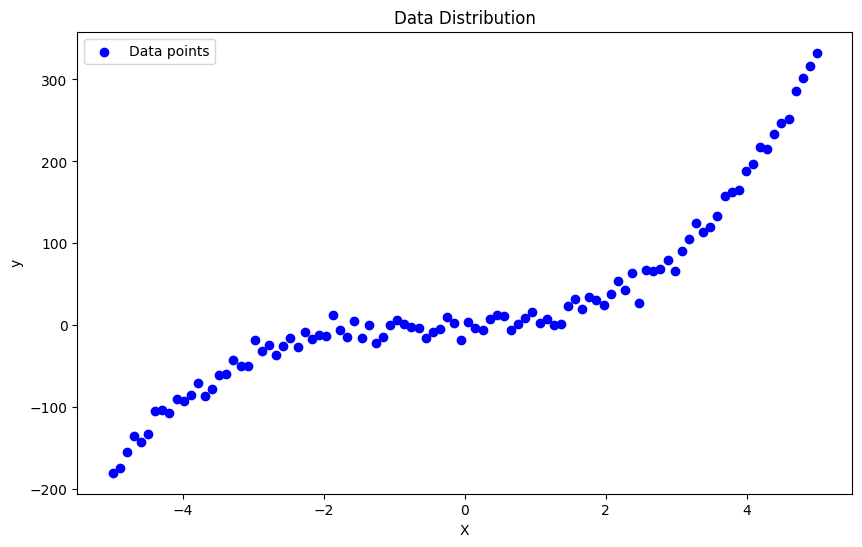

In [3]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-5, 5, 100)
y = 2 * X + 3 * X**2 + 2 * X**3 + np.random.normal(0, 10, 100)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.title('Data Distribution')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 3. Display dataset dimensions
print(f"Total number of samples: {len(X)}")
print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.0f}%)")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(X)*100:.0f}%)")

Total number of samples: 100
Training set size: 80 (80%)
Validation set size: 20 (20%)


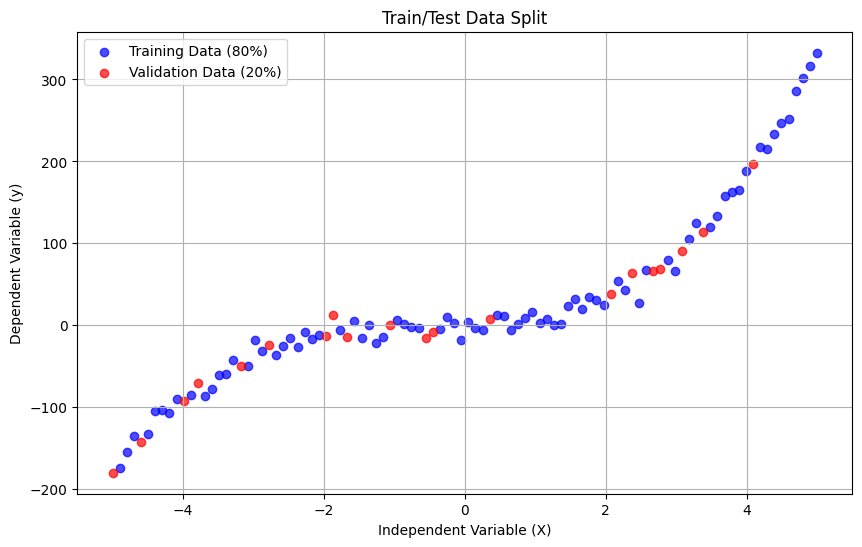

In [5]:
# 4. Plot Scatter with different colors
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Training Data (80%)')
plt.scatter(X_val, y_val, color='red', alpha=0.7, label='Validation Data (20%)')

plt.title('Train/Test Data Split')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
X_p = np.column_stack([X**i for i in range(3+1)]) 
X_p[:10]

array([[   1.        ,   -5.        ,   25.        , -125.        ],
       [   1.        ,   -4.8989899 ,   24.00010203, -117.57625742],
       [   1.        ,   -4.7979798 ,   23.02061014, -110.4524224 ],
       [   1.        ,   -4.6969697 ,   22.06152433, -103.62231127],
       [   1.        ,   -4.5959596 ,   21.12284461,  -97.07974037],
       [   1.        ,   -4.49494949,   20.20457096,  -90.81852604],
       [   1.        ,   -4.39393939,   19.3067034 ,  -84.83248463],
       [   1.        ,   -4.29292929,   18.42924191,  -79.11543246],
       [   1.        ,   -4.19191919,   17.57218651,  -73.66118588],
       [   1.        ,   -4.09090909,   16.73553719,  -68.46356123]])

In [7]:
#####################################################
def polynomial_regression(X, y, degree):
    # Create design matrix
    X_p = np.column_stack([X**i for i in range(degree+1)])  
    alpha =  np.linalg.inv(X_p.T @ X_p) @ X_p.T @ y  
    return alpha
    
#####################################################

# 2. Prediction function
def predict(X, alpha):
    degree = len(alpha) - 1
    X_p = np.column_stack([X**i for i in range(degree+1)])
    return X_p @ alpha
import numpy as np

#####################################################

def calculate_r2(y_true, y_pred):
    # Calculate total sum of squares
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    # Calculate residual sum of squares
    ss_residual = np.sum((y_true - y_pred)**2)
    # Calculate R² score
    r2 = 1 - (ss_residual / ss_total) 
    return r2
    
#####################################################

def mean_squared_error(y_true, y_pred):
    # Calculate squared differences
    squared_errors = (y_true - y_pred)**2
    # Calculate mean of squared errors
    mse = np.mean(squared_errors)   
    return mse
    
#####################################################

In [8]:
# Calculate coefficients for degree 3
degree = 3
alpha = polynomial_regression(X_train, y_train, degree)
print(f"Coefficients for degree {degree}: {alpha}")

Coefficients for degree 3: [-2.01775376  3.81235991  3.1057581   1.89006146]


In [9]:
# Calculate predictions and evaluation metrics
y_train_pred = predict(X_train, alpha)
y_test_pred = predict(X_val, alpha)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_val, y_test_pred)
train_r2 = calculate_r2(y_train, y_train_pred)
test_r2 = calculate_r2(y_val, y_test_pred)

# Display results
print("\n" + "="*50)
print(f"{'Model Evaluation Metrics':^50}")
print("="*50)
print(f"{'Dataset':<15} | {'MSE':<15} | {'R² Score':<15}")
print("-"*50)
print(f"{'Training':<15} | {train_mse:<15.4f} | {train_r2:<15.4f}")
print(f"{'Test':<15} | {test_mse:<15.4f} | {test_r2:<15.4f}")
print("="*50 + "\n")

# Display interpretation
print("Interpretation:")
print(f"- Training MSE: {train_mse:.4f} (Lower is better)")
print(f"- Test MSE: {test_mse:.4f} (Lower is better)")
print(f"- Training R²: {train_r2:.4f} (1.0 is perfect fit)")
print(f"- Test R²: {test_r2:.4f} (1.0 is perfect fit)")

# Analyze train-test difference
if train_mse < test_mse * 1.1:
    print("\nThe model shows good generalization with similar train/test performance.")
elif train_mse < test_mse * 1.5:
    print("\nModerate overfitting detected (test error > train error).")
else:
    print("\nSevere overfitting detected (test error much higher than train error).")


             Model Evaluation Metrics             
Dataset         | MSE             | R² Score       
--------------------------------------------------
Training        | 81.6024         | 0.9932         
Test            | 60.2247         | 0.9917         

Interpretation:
- Training MSE: 81.6024 (Lower is better)
- Test MSE: 60.2247 (Lower is better)
- Training R²: 0.9932 (1.0 is perfect fit)
- Test R²: 0.9917 (1.0 is perfect fit)

Moderate overfitting detected (test error > train error).


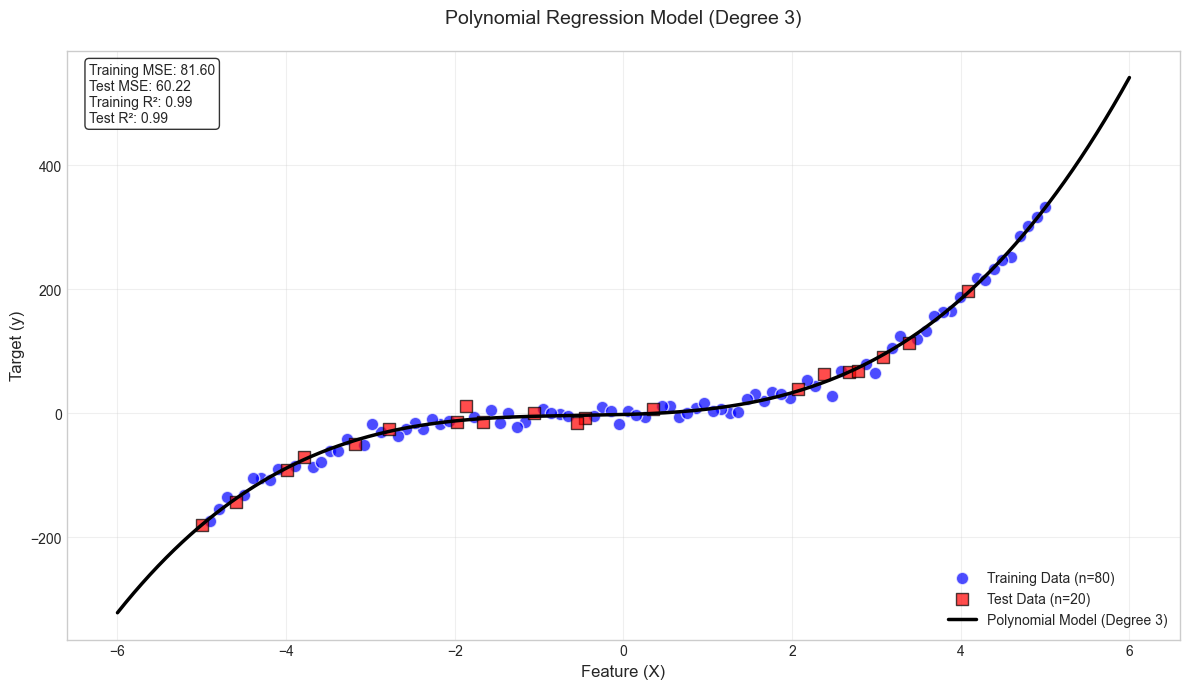

In [10]:
# 1. Create points for plotting the model curve
X_plot = np.linspace(min(X)-1, max(X)+1, 500)  # Extend range for better visualization
y_plot = predict(X_plot, alpha)

# 2. Plot settings
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

# 3. Plot training and test data
plt.scatter(X_train, y_train, color='blue', alpha=0.7, 
            label=f'Training Data (n={len(X_train)})', edgecolors='w', s=80)
plt.scatter(X_val, y_val, color='red', alpha=0.7, 
            label=f'Test Data (n={len(X_val)})', marker='s', edgecolors='k', s=80)

# 4. Plot model curve
plt.plot(X_plot, y_plot, 'k-', linewidth=2.5, 
         label=f'Polynomial Model (Degree {degree})')

# 5. Add evaluation metrics to plot
metrics_text = (f'Training MSE: {train_mse:.2f}\n'
                f'Test MSE: {test_mse:.2f}\n'
                f'Training R²: {train_r2:.2f}\n'
                f'Test R²: {test_r2:.2f}')

plt.text(0.02, 0.98, metrics_text, 
         transform=plt.gca().transAxes,
         verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 6. Appearance settings
plt.title(f'Polynomial Regression Model (Degree {degree})', pad=20, fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)

# 7. Display plot
plt.tight_layout()
plt.show()

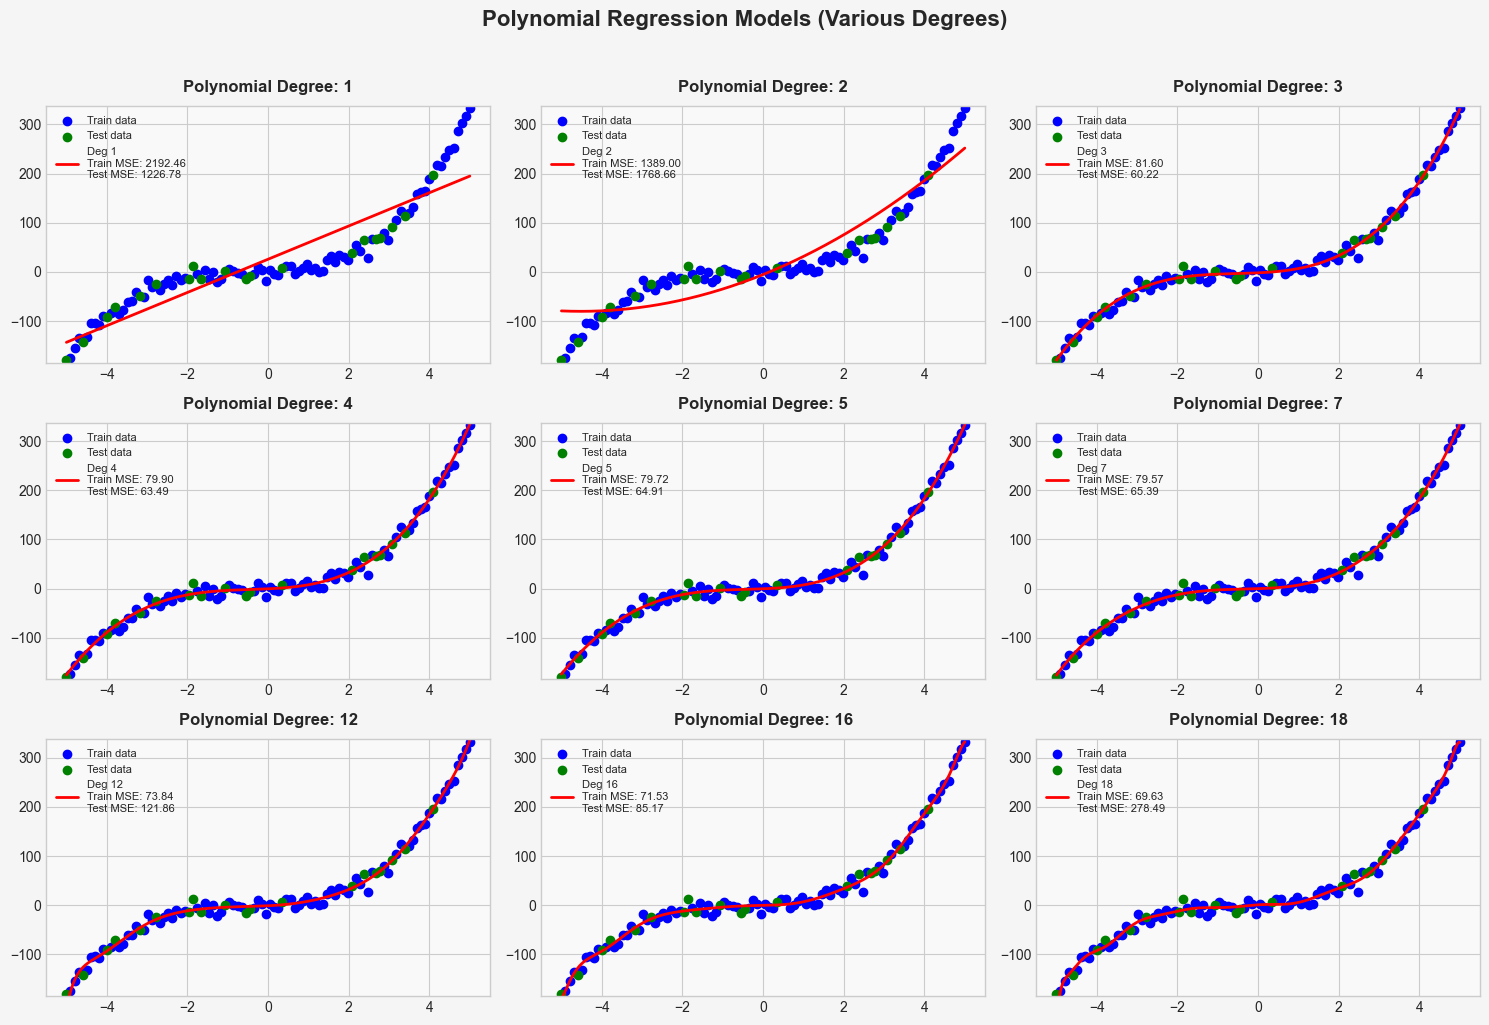

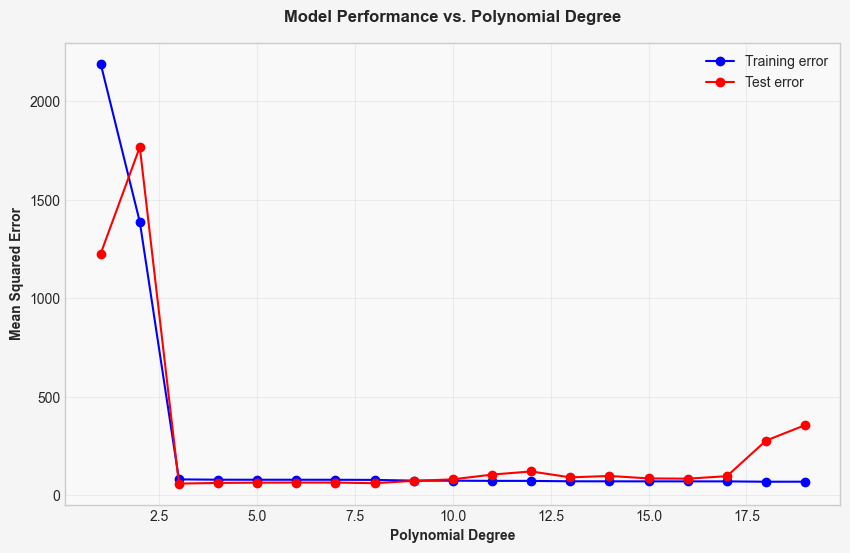

In [21]:
## 3. Modeling for different degrees
degrees = [1, 2, 3, 4, 5, 7, 12, 16, 18]  

# 6. Plot graphs
plt.figure(figsize=(15, 10), facecolor='#f5f5f5')  # Added light gray background
for i, degree in enumerate(degrees):
    # Calculate coefficients using polynomial_regression function
    alpha = polynomial_regression(X_train, y_train, degree)
    
    # Calculate errors
    y_train_pred = predict(X_train, alpha)
    y_test_pred = predict(X_val, alpha)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_val, y_test_pred)
    
    # Plot graph
    #plt.style.use('seaborn-v0_8-whitegrid') 
    plt.subplot(3, 3, i+1)
    plt.gca().set_facecolor('#f9f9f9')  # Light background for each subplot
    
    # Data points
    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_val, y_val, color='green', label='Test data')
    
    # Model prediction line
    X_plot = np.linspace(-5, 5, 500)
    y_plot = predict(X_plot, alpha)
    plt.plot(X_plot, y_plot, color='red', linewidth=2,
             label=f'Deg {degree}\nTrain MSE: {train_error:.2f}\nTest MSE: {test_error:.2f}')
    
    plt.title(f'Polynomial Degree: {degree}', fontweight='bold', pad=10)  # Modified title style
    plt.ylim(min(y)-5, max(y)+5)
    plt.legend(loc='upper left', fontsize=8)

plt.suptitle('Polynomial Regression Models (Various Degrees)', fontsize=16, fontweight='bold', y=1.02)  # Added main title
plt.tight_layout()
plt.show()

# 7. Error plot based on polynomial degree
train_errors = []
test_errors = []
degrees_range = range(1, 20)

for degree in degrees_range:
    alpha = polynomial_regression(X_train, y_train, degree)
    y_train_pred = predict(X_train, alpha)
    y_test_pred = predict(X_val, alpha)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_val, y_test_pred))

plt.figure(figsize=(10, 6), facecolor='#f5f5f5')  # Added light gray background
plt.gca().set_facecolor('#f9f9f9')  # Light background for plot area
plt.plot(degrees_range, train_errors, 'b-o', label='Training error')
plt.plot(degrees_range, test_errors, 'r-o', label='Test error')
plt.xlabel('Polynomial Degree', fontweight='bold')
plt.ylabel('Mean Squared Error', fontweight='bold')
plt.title('Model Performance vs. Polynomial Degree', fontweight='bold', pad=15)  # Modified title
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [218]:
###############################################################
###############################################################

In [14]:
# Calculate coefficients for degree 22
degree = 22
alpha = polynomial_regression(X_train, y_train, degree)
print(f"Coefficients for degree {degree}: {alpha}")

Coefficients for degree 22: [-2.62094814e+01 -1.82685883e-01  2.73606233e+01  1.22122349e+01
 -4.14783539e+01 -8.77373166e+00  3.03830231e+01  3.80337483e+00
 -1.08839046e+01 -9.34344781e-01  2.20695650e+00  1.37529219e-01
 -2.73941078e-01 -1.25331751e-02  2.15833956e-02  7.12565490e-04
 -1.08379783e-03 -2.46048095e-05  3.36055951e-05  4.72232715e-07
 -5.86484111e-07 -3.86520791e-09  4.40660722e-09]


In [15]:
# محاسبه پیش‌بینی‌ها و معیارهای ارزیابی
y_train_pred = predict(X_train, alpha)
y_test_pred = predict(X_val, alpha)

# محاسبه معیارهای ارزیابی
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_val, y_test_pred)
train_r2 = calculate_r2(y_train, y_train_pred)
test_r2 = calculate_r2(y_val, y_test_pred)

# نمایش نتایج
print("\n" + "="*50)
print(f"{'Model Evaluation Metrics':^50}")
print("="*50)
print(f"{'Dataset':<15} | {'MSE':<15} | {'R² Score':<15}")
print("-"*50)
print(f"{'Training':<15} | {train_mse:<15.4f} | {train_r2:<15.4f}")
print(f"{'Test':<15} | {test_mse:<15.4f} | {test_r2:<15.4f}")
print("="*50 + "\n")

# نمایش تفسیر نتایج
print("Interpretation:")
print(f"- Training MSE: {train_mse:.4f} (Lower is better)")
print(f"- Test MSE: {test_mse:.4f} (Lower is better)")
print(f"- Training R²: {train_r2:.4f} (1.0 is perfect fit)")
print(f"- Test R²: {test_r2:.4f} (1.0 is perfect fit)")

# تحلیل اختلاف بین train و test
if train_mse < test_mse * 1.1:
    print("\nThe model shows good generalization with similar train/test performance.")
elif train_mse < test_mse * 1.5:
    print("\nModerate overfitting detected (test error > train error).")
else:
    print("\nSevere overfitting detected (test error much higher than train error).")


             Model Evaluation Metrics             
Dataset         | MSE             | R² Score       
--------------------------------------------------
Training        | 232.4823        | 0.9805         
Test            | 803.0274        | 0.8887         

Interpretation:
- Training MSE: 232.4823 (Lower is better)
- Test MSE: 803.0274 (Lower is better)
- Training R²: 0.9805 (1.0 is perfect fit)
- Test R²: 0.8887 (1.0 is perfect fit)

The model shows good generalization with similar train/test performance.


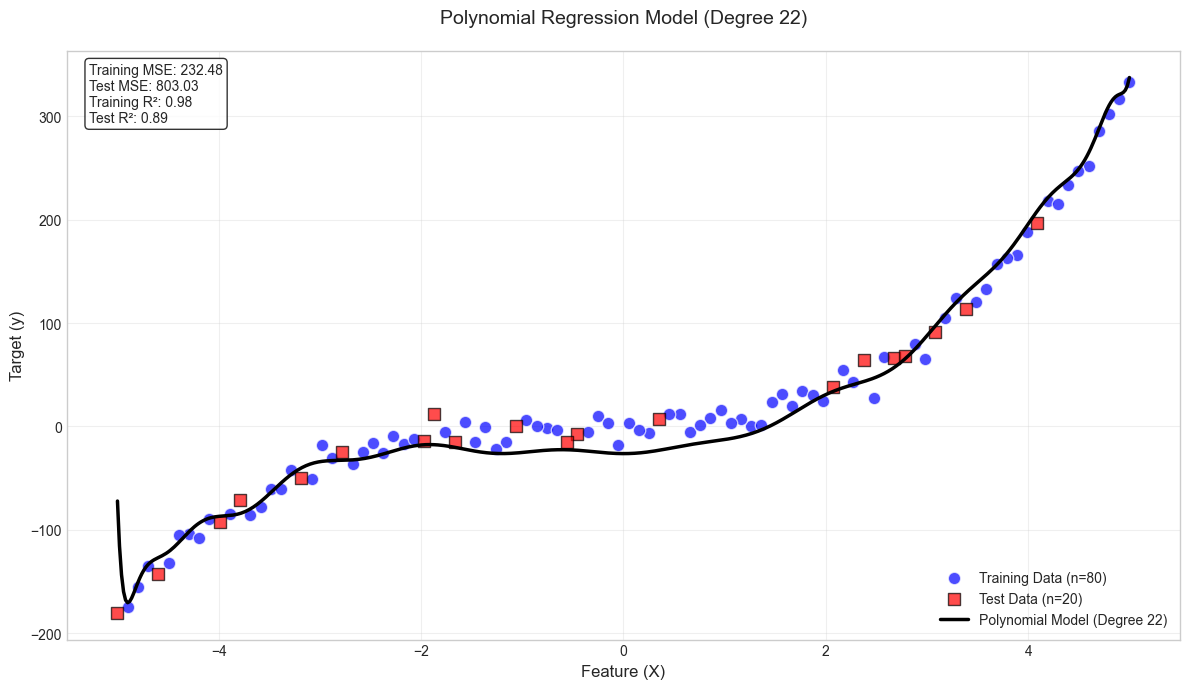

In [16]:
# 1. Create points for plotting model curve
X_plot = np.linspace(-5, 5, 500)  # Extend range for better visualization
y_plot = predict(X_plot, alpha)

# 2. Plot settings
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

# 3. Plot training and test data
plt.scatter(X_train, y_train, color='blue', alpha=0.7, 
            label=f'Training Data (n={len(X_train)})', edgecolors='w', s=80)
plt.scatter(X_val, y_val, color='red', alpha=0.7, 
            label=f'Test Data (n={len(X_val)})', marker='s', edgecolors='k', s=80)

# 4. Plot model curve
plt.plot(X_plot, y_plot, 'k-', linewidth=2.5, 
         label=f'Polynomial Model (Degree {degree})')

# 5. Add evaluation metrics to plot
metrics_text = (f'Training MSE: {train_mse:.2f}\n'
                f'Test MSE: {test_mse:.2f}\n'
                f'Training R²: {train_r2:.2f}\n'
                f'Test R²: {test_r2:.2f}')

plt.text(0.02, 0.98, metrics_text, 
         transform=plt.gca().transAxes,
         verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 6. Appearance settings
plt.title(f'Polynomial Regression Model (Degree {degree})', pad=20, fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)

# 7. Display plot
plt.tight_layout()
plt.show()

In [72]:
# Finish